## 0. Load Data

## 1. Instantiate Engine
* workers : number of processes
* tol     : tolerance for differences when creating training data (set to 0 if data is completely clean)
* eps     : error bound for inverse covariance estimation (since we use conservative calculation when determining minimum sample size, we recommend to set eps <= 0.01)
* embedtxt: if set to true, differentiate b/w textual data and categorical data, and use word embedding for the former

In [1]:
from profiler.core import *

In [2]:
pf = Profiler(workers=2, tol=1e-6, eps=0.01, embedtxt=True)

## 2. Load Data
* name: any name you like
* src: \[FILE; DF; DB (not implemented)\]
* fpath: required if src == FILE
* df: required if src == DF
* check_param: print parameters used for data loading

In [3]:
pf.session.load_data(name='nypd', src=FILE, fpath='data/large_data/nypd.csv', check_param=True)

INFO:profiler.utility:[0.0074498653411865234] Load Data start

INFO:profiler.data.dataset:parameters used for data loading:
 {'na_values': {'', 'none', 'nan', 'unknown', 'None', '?', 'NaN'}, 'sep': ',', 'header': 'infer', 'dropcol': None, 'dropna': False, 'encoding': 'utf-8', 'normalize': True, 'min_categories_for_embedding': 10}
INFO:profiler.data.dataset:inferred types of attributes: {
    "CMPLNT_NUM": "numeric",
    "ADDR_PCT_CD": "numeric",
    "BORO_NM": "categorical",
    "CMPLNT_FR_DT": "text",
    "CMPLNT_FR_TM": "text",
    "CMPLNT_TO_DT": "text",
    "CMPLNT_TO_TM": "text",
    "CRM_ATPT_CPTD_CD": "categorical",
    "HADEVELOPT": "text",
    "HOUSING_PSA": "numeric",
    "JURISDICTION_CODE": "numeric",
    "JURIS_DESC": "text",
    "KY_CD": "numeric",
    "LAW_CAT_CD": "categorical",
    "LOC_OF_OCCUR_DESC": "categorical",
    "OFNS_DESC": "text",
    "PARKS_NM": "text",
    "PATROL_BORO": "categorical",
    "PD_CD": "numeric",
    "PD_DESC": "text",
    "PREM_TYP_DESC": "te

In [4]:
pf.session.ds.df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,SUSP_SEX,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,857927015,10.0,manhattan,01/29/2019,16:37:00,01/29/2019,16:45:00,completed,nan,NaN,...,m,NaN,unknown,unknown,m,984140.0,211709.0,40.747777,-74.000398,"(40.747777093, -74.000398443)"
1,479254687,101.0,queens,03/29/2019,17:00:00,03/29/2019,17:10:00,completed,nan,NaN,...,m,NaN,25-44,black,f,1054076.0,157437.0,40.598538,-73.748560,"(40.598537593, -73.748559596)"
2,320007604,41.0,bronx,02/06/2019,02:00:00,nan,nan,completed,nan,NaN,...,m,NaN,unknown,unknown,d,1011589.0,237996.0,40.819886,-73.901227,"(40.819885621, -73.901226998)"
3,746022144,68.0,brooklyn,01/08/2019,22:49:00,01/08/2019,22:52:00,completed,nan,NaN,...,m,NaN,unknown,unknown,e,984439.0,166855.0,40.624663,-73.999321,"(40.624663129, -73.999320591)"
4,593941718,45.0,bronx,03/17/2019,05:00:00,03/17/2019,05:20:00,completed,nan,NaN,...,m,NaN,25-44,black hispanic,f,1027255.0,244817.0,40.838545,-73.844583,"(40.838544913, -73.844582889)"


### 2.1 Change Data Types of Attributes
* required input:
    * a list of attributes
    * a list of data types (must match the order of the attributes; can be CATEGORICAL, NUMERIC, TEXT, DATE)
* optional input:
    * a list of regular expression extractor

In [5]:
pf.session.change_dtypes(["CMPLNT_FR_DT","CMPLNT_FR_TM", "CMPLNT_TO_DT", "CMPLNT_TO_TM"],
                          [DATE,DATE,DATE,DATE])

INFO:profiler.data.dataset:updated operators of CMPLNT_FR_DT to ['equal']
INFO:profiler.data.dataset:updated operators of CMPLNT_FR_TM to ['equal']
INFO:profiler.data.dataset:updated operators of CMPLNT_TO_DT to ['equal']
INFO:profiler.data.dataset:updated operators of CMPLNT_TO_TM to ['equal']
INFO:profiler.data.dataset:updated inferred operators of attributes: {'CMPLNT_NUM': ['equal'], 'ADDR_PCT_CD': ['equal'], 'BORO_NM': ['equal'], 'CMPLNT_FR_DT': ['equal'], 'CMPLNT_FR_TM': ['equal'], 'CMPLNT_TO_DT': ['equal'], 'CMPLNT_TO_TM': ['equal'], 'CRM_ATPT_CPTD_CD': ['equal'], 'HADEVELOPT': ['equal'], 'HOUSING_PSA': ['equal'], 'JURISDICTION_CODE': ['equal'], 'JURIS_DESC': ['equal'], 'KY_CD': ['equal'], 'LAW_CAT_CD': ['equal'], 'LOC_OF_OCCUR_DESC': ['equal'], 'OFNS_DESC': ['equal'], 'PARKS_NM': ['equal'], 'PATROL_BORO': ['equal'], 'PD_CD': ['equal'], 'PD_DESC': ['equal'], 'PREM_TYP_DESC': ['equal'], 'RPT_DT': ['equal'], 'STATION_NAME': ['equal'], 'SUSP_AGE_GROUP': ['equal'], 'SUSP_RACE': ['eq

### 2.2. Load/Train Embeddings for TEXT
* path: path to saved/to-save embedding folder
* load: set to true -- load saved vec from 'path'; set to false -- train locally
* save: (only for load = False) save trained vectors to 'path'

In [6]:
pf.session.load_embedding(save=True, path='data/nypd/', load=True)

INFO:profiler.utility:[6.279555320739746] Load Embedding start

INFO:profiler.utility:[6.951590538024902] Load Embedding execution time: 0.6720352172851562



In [7]:
pf.session.embed.models

{'HADEVELOPT': <profiler.data.embedding.FT at 0x7f36c4a65a10>,
 'JURIS_DESC': <profiler.data.embedding.FT at 0x7f36c4bbb250>,
 'OFNS_DESC': <profiler.data.embedding.FT at 0x7f36c4a65b90>,
 'PARKS_NM': <profiler.data.embedding.FT at 0x7f36c4bbb590>,
 'PD_DESC': <profiler.data.embedding.FT at 0x7f36c5540250>,
 'PREM_TYP_DESC': <profiler.data.embedding.FT at 0x7f36c4bbb050>,
 'RPT_DT': <profiler.data.embedding.FT at 0x7f36c59a5090>,
 'STATION_NAME': <profiler.data.embedding.FT at 0x7f36c5bd3910>,
 'SUSP_AGE_GROUP': <profiler.data.embedding.FT at 0x7f36c5bd3410>,
 'VIC_AGE_GROUP': <profiler.data.embedding.FT at 0x7f36aba0ea50>,
 'Lat_Lon': <profiler.data.embedding.FT at 0x7f36c482b9d0>}

## 3. Load Training Data
* multiplier: if set to None, will infer the minimal sample size; otherwise, it will create (# samples) * (# attributes) * (multiplier) training samples

In [8]:
pf.session.load_training_data(multiplier = None, sample_frac=0.2)

INFO:profiler.utility:[6.969825267791748] Create Training Data start

INFO:profiler.data.transformer:needs multiplier = 14 to bound the error in inv cov estimation <= 0.01000000
INFO:profiler.data.transformer:use multiplier = 14, and the bound is 0.00000795
INFO:profiler.data.transformer:Draw Pairs
100%|██████████| 35/35 [00:07<00:00,  4.50it/s]
INFO:profiler.data.transformer:Number of training samples: 1556800
INFO:profiler.data.transformer:Computing Differences
/mydata/Profiler-Public/profiler/data/transformer.py:96: RuntimeWarning: invalid value encountered in greater_equal
  df[attr] = (normalized_sim(diff) >= 1 - env['tol'])*1
INFO:profiler.data.transformer:estimated missing data probability in training data is 0.0699
INFO:profiler.utility:[137.2109396457672] Create Training Data execution time: 130.24111437797546



## 4. Learn Structure
* sparsity: intensity of L1-regularizer in inverse covariance estimation (glasso)
* take_neg: if set to true, consider equal -> equal only

In [9]:
autoregress_matrix = pf.session.learn_structure(sparsity=0.03, infer_order=True)

INFO:profiler.utility:[137.2220323085785] Learn Structure start

INFO:profiler.learner:use threshold 0.1654
INFO:profiler.utility:[138.36861610412598] Learn Structure execution time: 1.1465837955474854



* score: 
    * "fit_error": mse for fitting y = B'X + c for each atttribute y 
    * "training_data_fd_vio_ratio": the higher the score, the more violations of FDs in the training data. (bounded: \[0,1\])

In [17]:
parent_sets = pf.session.get_dependencies(score="fit_error")

INFO:profiler.utility:[298.12139678001404] Get Dependencies start



CMPLNT_FR_DT -> CMPLNT_TO_DT (0.035261170522633396)
CMPLNT_FR_DT,CMPLNT_TO_DT -> RPT_DT (0.04096852051898746)
JURIS_DESC -> HADEVELOPT (0.056552440303032143)
JURIS_DESC,HADEVELOPT -> JURISDICTION_CODE (0.002856137471472486)
JURIS_DESC,JURISDICTION_CODE -> STATION_NAME (0.039998952665271016)
JURIS_DESC,JURISDICTION_CODE -> PREM_TYP_DESC (0.17134946646486024)
PREM_TYP_DESC -> LOC_OF_OCCUR_DESC (0.2404921659863756)
SUSP_AGE_GROUP -> SUSP_RACE (0.1570296139970286)
SUSP_AGE_GROUP,SUSP_RACE -> SUSP_SEX (0.17697460700871312)
VIC_AGE_GROUP -> VIC_RACE (0.17949756416626922)
VIC_AGE_GROUP,VIC_RACE -> VIC_SEX (0.21998125906404778)
KY_CD -> OFNS_DESC (0.008361891779969148)
KY_CD,OFNS_DESC -> PD_CD (0.05412270613957314)
KY_CD,OFNS_DESC,PD_CD -> PD_DESC (0.0040052515366016984)
KY_CD,OFNS_DESC -> LAW_CAT_CD (0.181350812611649)
Y_COORD_CD -> ADDR_PCT_CD (0.07032615296735219)
Y_COORD_CD,ADDR_PCT_CD -> X_COORD_CD (0.013031539441263652)
Y_COORD_CD,ADDR_PCT_CD,X_COORD_CD -> Latitude (0.0053637427271859125

INFO:profiler.utility:[299.03194880485535] Get Dependencies execution time: 0.9105520248413086



Y_COORD_CD,ADDR_PCT_CD,X_COORD_CD,Latitude -> Longitude (0.003196415782792007)
Y_COORD_CD,ADDR_PCT_CD,X_COORD_CD,Latitude,Longitude -> Lat_Lon (0.0015371070638584157)
Y_COORD_CD,ADDR_PCT_CD -> PATROL_BORO (0.13993216418367038)
PATROL_BORO -> BORO_NM (0.07876540360107837)


## 5. Visualization

In [11]:
pf.session.visualize_covariance()

<Figure size 1000x800 with 2 Axes>

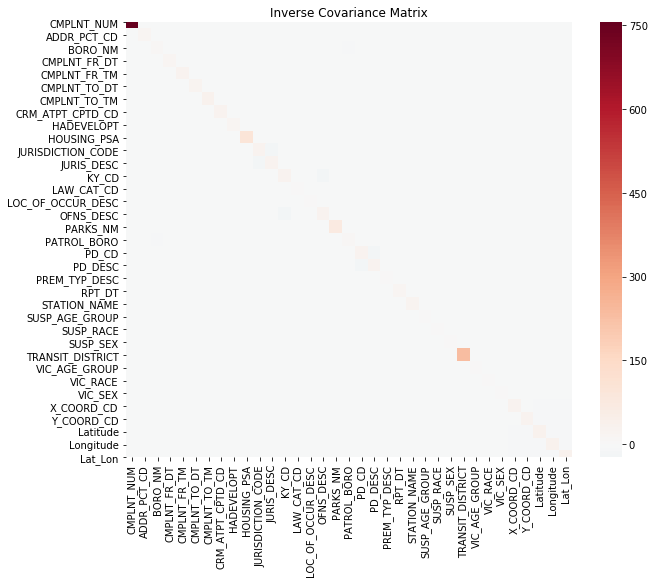

In [12]:
pf.session.visualize_inverse_covariance()

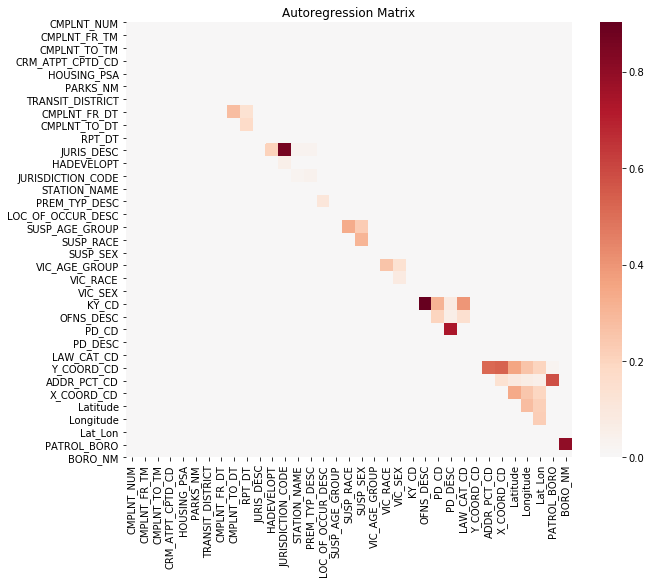

In [13]:
pf.session.visualize_autoregression()

In [14]:
pf.session.timer.get_stat()

,time_point,msg,execution_time
0,0.007450,start: Load Data,0.000000
1,5.568037,end: Load Data,5.560587
2,6.279555,start: Load Embedding,0.000000
3,6.951591,end: Load Embedding,0.672035
4,6.969825,start: Create Training Data,0.000000
5,137.210940,end: Create Training Data,130.241114
6,137.222032,start: Learn Structure,0.000000
7,138.368616,end: Learn Structure,1.146584
8,138.376571,start: Get Dependencies,0.000000
9,138.401845,end: Get Dependencies,0.025274
